In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
artwork = pd.read_csv('dataset/artists.csv')

In [71]:
artwork.head(5)

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


# Start Data Cleaning ...

In [72]:
artwork['DeathYear'] = artwork.years.str[6:11]

In [73]:
artwork['BirthYear'] = artwork.years.str[0:5]

In [74]:
artwork['BirthYear'] = pd.to_numeric(artwork['BirthYear'])

In [75]:
artwork['DeathYear'] = pd.to_numeric(artwork['DeathYear'],errors='coerce')

In [76]:
artwork['Age'] = artwork['DeathYear'] - artwork['BirthYear']

In [77]:
del artwork['years']
del artwork['bio']
del artwork['wikipedia']
del artwork['id']

In [78]:
artwork.head(5)

,name,genre,nationality,paintings,DeathYear,BirthYear,Age
0,Amedeo Modigliani,Expressionism,Italian,193,1920.0,1884,36.0
1,Vasiliy Kandinskiy,"Expressionism,Abstractionism",Russian,88,1944.0,1866,78.0
2,Diego Rivera,"Social Realism,Muralism",Mexican,70,1957.0,1886,71.0
3,Claude Monet,Impressionism,French,73,1926.0,1840,86.0
4,Rene Magritte,"Surrealism,Impressionism",Belgian,194,1967.0,1898,69.0


In [79]:
artwork['str_split'] = artwork.genre.str.split(',')

In [80]:
artwork['Genre'] = artwork.str_split.str.get(0)

In [81]:
artwork['str_split_natio'] = artwork.nationality.str.split(',')

In [82]:
artwork['nationality'] = artwork.str_split_natio.str.get(0)

In [83]:
del artwork['str_split']
del artwork['genre']
del artwork['str_split_natio']

In [84]:
artwork.head(5)

,name,nationality,paintings,DeathYear,BirthYear,Age,Genre
0,Amedeo Modigliani,Italian,193,1920.0,1884,36.0,Expressionism
1,Vasiliy Kandinskiy,Russian,88,1944.0,1866,78.0,Expressionism
2,Diego Rivera,Mexican,70,1957.0,1886,71.0,Social Realism
3,Claude Monet,French,73,1926.0,1840,86.0,Impressionism
4,Rene Magritte,Belgian,194,1967.0,1898,69.0,Surrealism


In [85]:
artwork_col = artwork.columns

In [86]:
new_col_list = []
for col in artwork_col:
     new_col_list.append(col.title())

In [87]:
artwork.columns = new_col_list

In [88]:
artwork.head(5)

,Name,Nationality,Paintings,Deathyear,Birthyear,Age,Genre
0,Amedeo Modigliani,Italian,193,1920.0,1884,36.0,Expressionism
1,Vasiliy Kandinskiy,Russian,88,1944.0,1866,78.0,Expressionism
2,Diego Rivera,Mexican,70,1957.0,1886,71.0,Social Realism
3,Claude Monet,French,73,1926.0,1840,86.0,Impressionism
4,Rene Magritte,Belgian,194,1967.0,1898,69.0,Surrealism


# Start Data Visualization and Analyze ...

In [89]:
sns.set(rc = {'figure.figsize':(13,8.27)})

# Nationality Vs Art 
Painters in the art world tend to deny the fact, nationality and territory have a major effect on artistic fame. The most recognized artists generally belong to a very select number of countries that are all Western and among which the France and Italy .

France is one of the popular country in art and painting , as you see between the years 1400 to 2000 more than 14 are french  ,and after this italia is a second country that has 8 painters into these years .

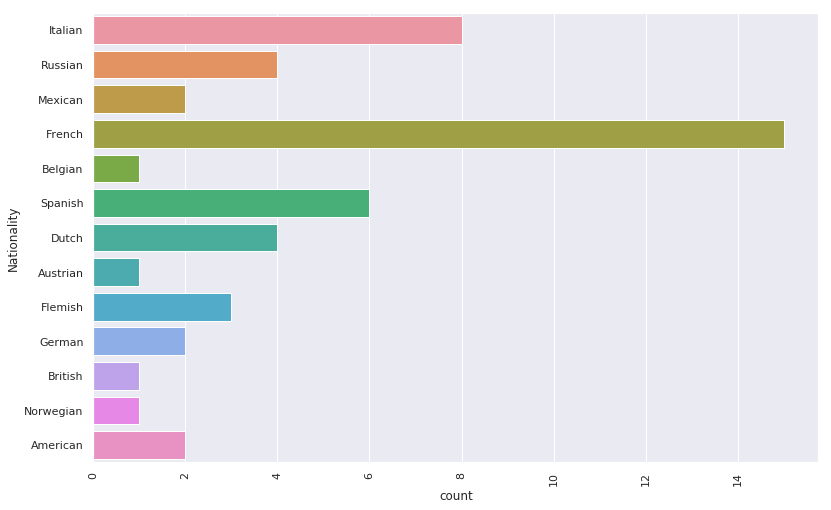

In [90]:
sns.countplot(y = 'Nationality' , data = artwork  )
plt.xticks(rotation = 90)
plt.show()

# Art Movement 
An art movement is a tendency or style in art with a specific common philosophy or goal, followed by a group of artists during a specific period of time, (usually a few months, years or decades) or, at least, with the heyday of the movement defined within a number of years. Art movements were especially important in modern art, when each consecutive movement was considered as a new avant-garde.

As you can see, with in these years amongest painters ,impressionism is the most popular movement .

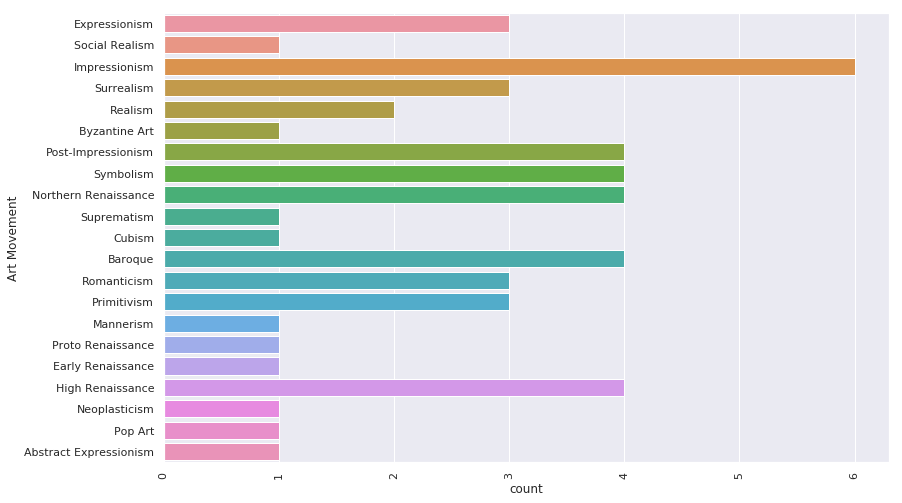

In [91]:
sns.countplot(y = 'Genre' , data = artwork )
plt.xticks(rotation = 90)
plt.ylabel('Art Movement')
plt.show()

# Art Movement vs Nationality
according to the diagram, as you can see, the ***Impressionism*** art movement in France and after this ***Renaissance*** in Italy and ***Post Impressionism*** has painted more than the combination of art movement and nationality.

In [92]:
grouped = artwork.groupby('Genre')['Nationality'].value_counts().to_frame()

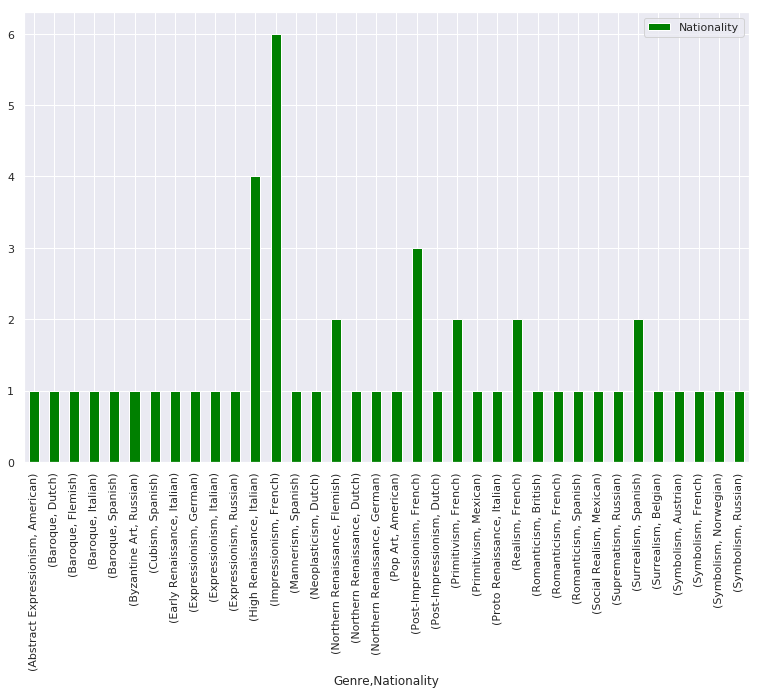

In [93]:
grouped.plot(kind = 'bar' , color = 'green')
plt.show()

# Age vs Painting
the average age for these painters is ***67.44 years***. according to this average and Demographic research at the beginning of the 19th century, no country in the world had a life expectancy longer than ***40 years***. 

"painters are the hopeful person in their life"(joke). 

In [94]:
artwork['Age'].mean()

67.44444444444444